In [1]:
import pickle
import torch
import numpy as np

In [2]:

exp = '12DriveEndFault'
with open('cwru_data.pkl', 'rb') as file:
    # Deserialize the dictionary
    loaded_dict = pickle.load(file)

data, labels = loaded_dict[exp]
normal_data, normal_labels = loaded_dict['Normal']

data = np.concatenate([data, normal_data], axis=0)
labels = np.concatenate([labels, normal_labels], axis=0)

data = data[:,:, np.newaxis]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
print("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [3]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'lstm'
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [6]:
from timegan import timegan

In [7]:
X_train = torch.tensor(X_train, dtype=torch.float32)

X_augmented = []
y_augmented = []
histories = {}
for label in np.unique(y_train):
    X_label = X_train[y_train == label]
    if X_label.shape[0] > 0:
        generated_data, history = timegan(X_label, parameters)
        histories[label] = history
        X_augmented.append(generated_data)
        y_augmented.extend([label] * generated_data.shape[0])
X_augmented = np.concatenate(X_augmented, axis=0)
y_augmented = np.array(y_augmented)

Step: 100/5000, e_loss_t0: 0.0014
Step: 200/5000, e_loss_t0: 0.0004
Step: 300/5000, e_loss_t0: 0.0003
Step: 400/5000, e_loss_t0: 0.0003
Step: 500/5000, e_loss_t0: 0.0003
Step: 600/5000, e_loss_t0: 0.0003
Step: 700/5000, e_loss_t0: 0.0002
Step: 800/5000, e_loss_t0: 0.0002
Step: 900/5000, e_loss_t0: 0.0002
Step: 1000/5000, e_loss_t0: 0.0002
Step: 1100/5000, e_loss_t0: 0.0002
Step: 1200/5000, e_loss_t0: 0.0003
Step: 1300/5000, e_loss_t0: 0.0002
Step: 1400/5000, e_loss_t0: 0.0002
Step: 1500/5000, e_loss_t0: 0.0002
Step: 1600/5000, e_loss_t0: 0.0001
Step: 1700/5000, e_loss_t0: 0.0001
Step: 1800/5000, e_loss_t0: 0.0001
Step: 1900/5000, e_loss_t0: 0.0001
Step: 2000/5000, e_loss_t0: 0.0001
Step: 2100/5000, e_loss_t0: 0.0001
Step: 2200/5000, e_loss_t0: 0.0001
Step: 2300/5000, e_loss_t0: 0.0001
Step: 2400/5000, e_loss_t0: 0.0000
Step: 2500/5000, e_loss_t0: 0.0001
Step: 2600/5000, e_loss_t0: 0.0000
Step: 2700/5000, e_loss_t0: 0.0002
Step: 2800/5000, e_loss_t0: 0.0000
Step: 2900/5000, e_loss_t0: 0

/content/timegan.py:173: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Z_mb = torch.tensor(random_generator(no, z_dim, ori_time, max_seq_len), dtype=torch.float32, device=device)


Step: 100/5000, e_loss_t0: 0.0026
Step: 200/5000, e_loss_t0: 0.0005
Step: 300/5000, e_loss_t0: 0.0005
Step: 400/5000, e_loss_t0: 0.0004
Step: 500/5000, e_loss_t0: 0.0003
Step: 600/5000, e_loss_t0: 0.0003
Step: 700/5000, e_loss_t0: 0.0003
Step: 800/5000, e_loss_t0: 0.0002
Step: 900/5000, e_loss_t0: 0.0002
Step: 1000/5000, e_loss_t0: 0.0001
Step: 1100/5000, e_loss_t0: 0.0001
Step: 1200/5000, e_loss_t0: 0.0001
Step: 1300/5000, e_loss_t0: 0.0001
Step: 1400/5000, e_loss_t0: 0.0001
Step: 1500/5000, e_loss_t0: 0.0001
Step: 1600/5000, e_loss_t0: 0.0001
Step: 1700/5000, e_loss_t0: 0.0000
Step: 1800/5000, e_loss_t0: 0.0000
Step: 1900/5000, e_loss_t0: 0.0000
Step: 2000/5000, e_loss_t0: 0.0000
Step: 2100/5000, e_loss_t0: 0.0000
Step: 2200/5000, e_loss_t0: 0.0000
Step: 2300/5000, e_loss_t0: 0.0000
Step: 2400/5000, e_loss_t0: 0.0000
Step: 2500/5000, e_loss_t0: 0.0000
Step: 2600/5000, e_loss_t0: 0.0000
Step: 2700/5000, e_loss_t0: 0.0000
Step: 2800/5000, e_loss_t0: 0.0000
Step: 2900/5000, e_loss_t0: 0

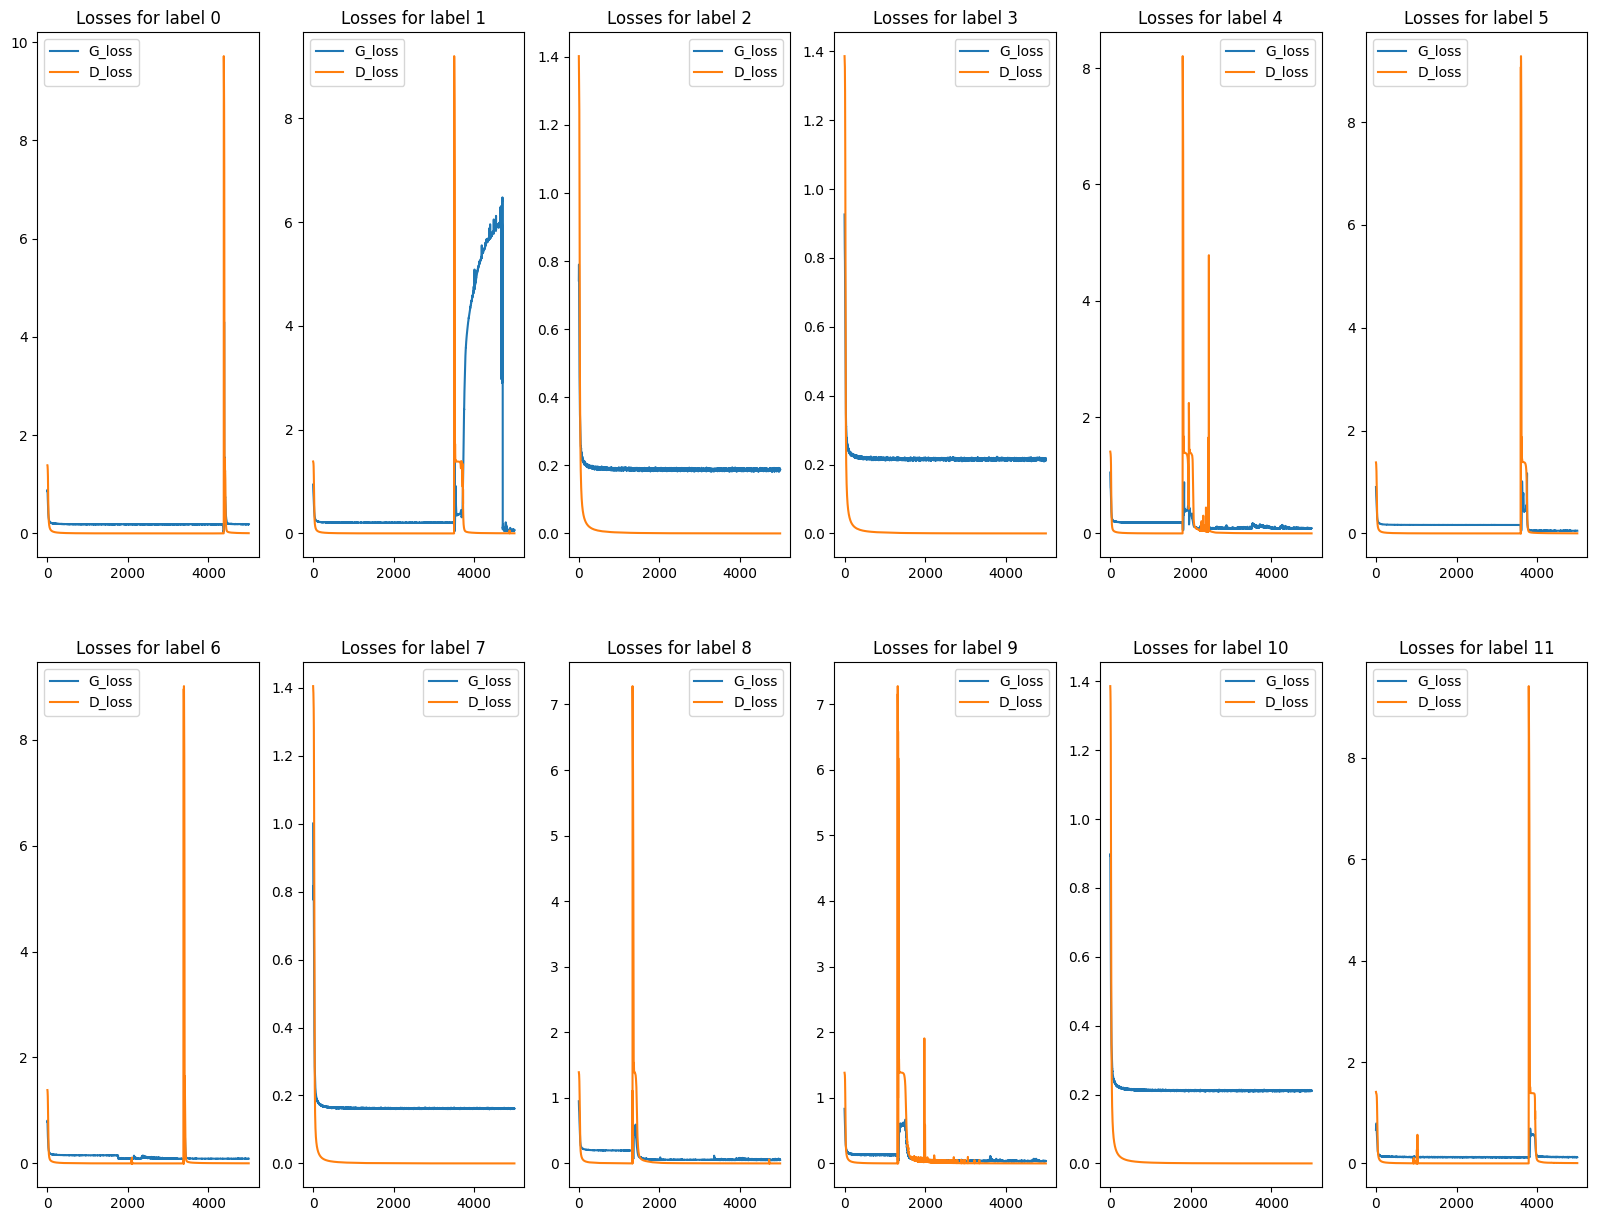

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for label, history in histories.items():
    plt.subplot(2, len(histories)//2, label+1)
    plt.plot(range(parameters['iterations']),history['G_loss'], label='G_loss')
    plt.plot(range(parameters['iterations']),history['D_loss'], label='D_loss')
    plt.title(f'Losses for label {label}')
    plt.legend()

In [9]:
X_augmented = X_augmented.reshape(X_augmented.shape[0], -1,1)
print(X_augmented.shape)

(7013, 1024, 1)


In [10]:
with open('augmented_data.pkl', 'wb') as file:
    # Serialize the dictionary and write to the file
    pickle.dump((X_augmented, y_augmented), file)